LIMPIEZA Y CARACTERÍSTICAS DEL DATASET

Cargando y limpiando el dataset...


Saving spotify-2023.csv to spotify-2023 (1).csv
Dimensiones del dataset: (953, 24)

Primeras 5 filas:
                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts

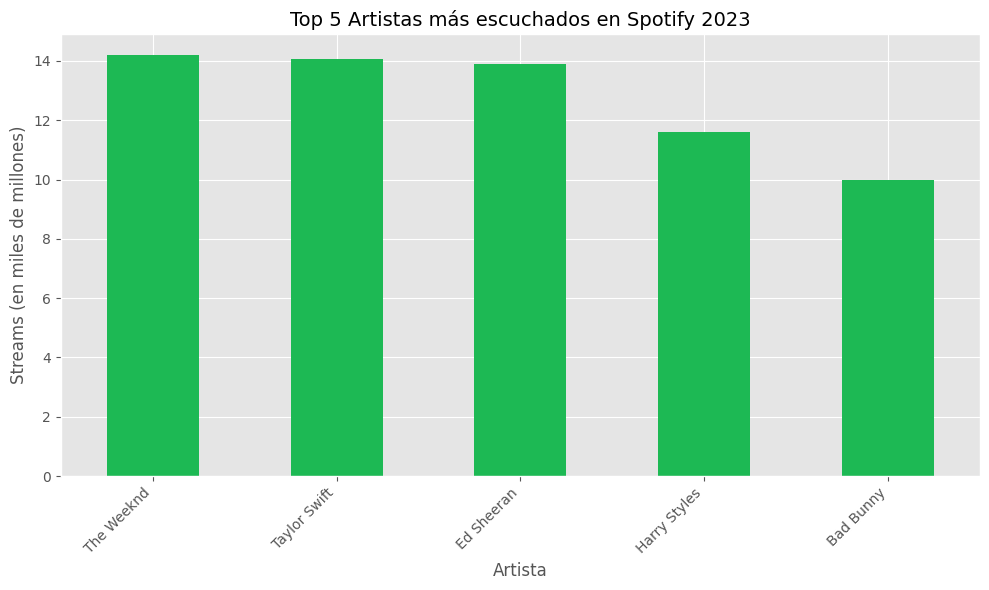

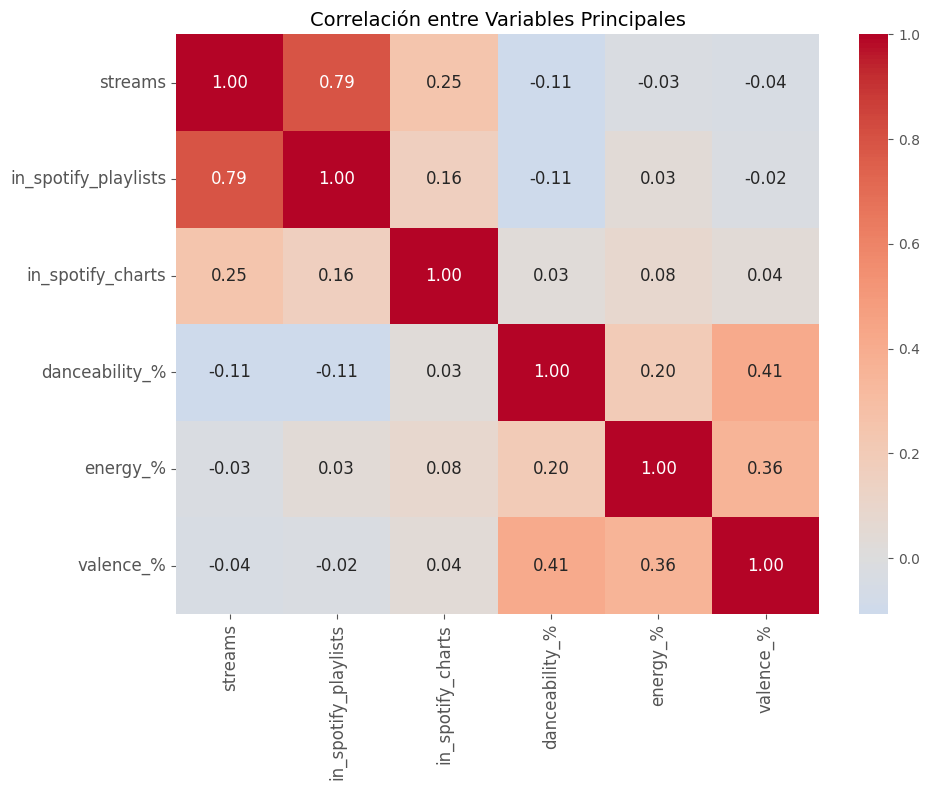

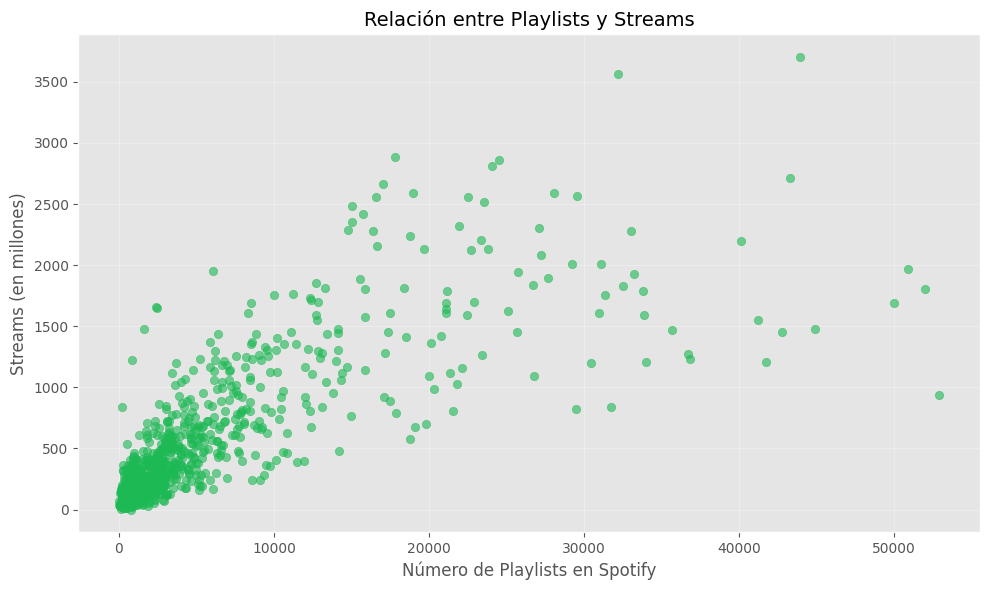


Información adicional:
- Total de canciones analizadas: 952
- Rango de años: 1930 - 2023
- Artista con más canciones en el top: Taylor Swift
- Promedio de streams por canción: 514.14 millones


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
# Configuración de visualización
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Carga y limpieza inicial del dataset
print("Cargando y limpiando el dataset...")
uploaded = files.upload()
df = pd.read_csv('spotify-2023.csv', encoding='latin-1')
# 2. Exploración inicial del dataset
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras 5 filas:")
print(df.head())

# 3. Verificar tipos de datos y valores nulos
print("\nTipos de datos:")
print(df.dtypes)
print("\nValores nulos por columna:")
print(df.isnull().sum())
# Eliminar filas completamente vacías
df = df.dropna(how='all')

# Limpieza de columnas numéricas
df['streams'] = pd.to_numeric(df['streams'].str.replace(',', ''), errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'].str.replace(',', ''), errors='coerce')

# Convertir otras columnas numéricas
numeric_cols = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists',
               'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts', 'bpm']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Eliminar filas con valores nulos importantes
df = df.dropna(subset=['streams', 'track_name', 'artist(s)_name'])

# 2. Estadísticas descriptivas
pd.set_option('display.float_format', '{:,.0f}'.format)
print("\nEstadísticas descriptivas:")
print(df.describe())

# 3. Análisis de correlación
print("\nMatriz de correlación (principales variables):")
corr_matrix = df[['streams', 'in_spotify_playlists', 'in_spotify_charts',
                 'danceability_%', 'energy_%', 'valence_%']].corr()
print(corr_matrix)

# 4. Top 5 artistas y canciones
print("\nTop 5 artistas más escuchados:")
top_artists = df.groupby('artist(s)_name')['streams'].sum().nlargest(5)
print(top_artists)

print("\nTop 5 canciones más escuchadas:")
top_songs = df[['track_name', 'artist(s)_name', 'streams']].nlargest(5, 'streams')
print(top_songs)

# 5. Visualizaciones
# Gráfico de artistas más escuchados
plt.figure(figsize=(10, 6))
(top_artists / 1e9).plot(kind='bar', color='#1DB954')
plt.title('Top 5 Artistas más escuchados en Spotify 2023', fontsize=14)
plt.ylabel('Streams (en miles de millones)', fontsize=12)
plt.xlabel('Artista', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Heatmap de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            annot_kws={"size": 12}, fmt=".2f")
plt.title('Correlación entre Variables Principales', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico de dispersión: streams vs playlists
plt.figure(figsize=(10, 6))
plt.scatter(df['in_spotify_playlists'], df['streams']/1e6, alpha=0.6, color='#1DB954')
plt.title('Relación entre Playlists y Streams', fontsize=14)
plt.xlabel('Número de Playlists en Spotify', fontsize=12)
plt.ylabel('Streams (en millones)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Resultados adicionales
print("\nInformación adicional:")
print(f"- Total de canciones analizadas: {len(df)}")
print(f"- Rango de años: {df['released_year'].min()} - {df['released_year'].max()}")
print(f"- Artista con más canciones en el top: {df['artist(s)_name'].value_counts().idxmax()}")
print(f"- Promedio de streams por canción: {df['streams'].mean()/1e6:.2f} millones")

ALGORITMO GENÉTICO


Ejecutando algoritmo genético para encontrar combinación óptima...
Generación 0: Mejor fitness = 0.2961
Generación 10: Mejor fitness = 0.5258
Generación 20: Mejor fitness = 0.5258
Generación 30: Mejor fitness = 0.5258
Generación 40: Mejor fitness = 0.5258

Mejor combinación encontrada de características musicales:
danceability_%: 27.0%
energy_%: 63.8%
valence_%: 10.2%
acousticness_%: 42.6%
liveness_%: 63.4%

Fitness (éxito estimado): 0.5258

Canciones reales más similares a la combinación óptima:
                                         track_name  \
514  Here We Goï¿½ï¿½ï¿½ Again (feat. Tyler, the Cr   
521                                         Dawn FM   
457                        Happy Xmas (War Is Over)   
565                                         deja vu   
686                        Still Don't Know My Name   

                                        artist(s)_name       streams  \
514                     The Weeknd, Tyler, The Creator    88,103,848   
521                   

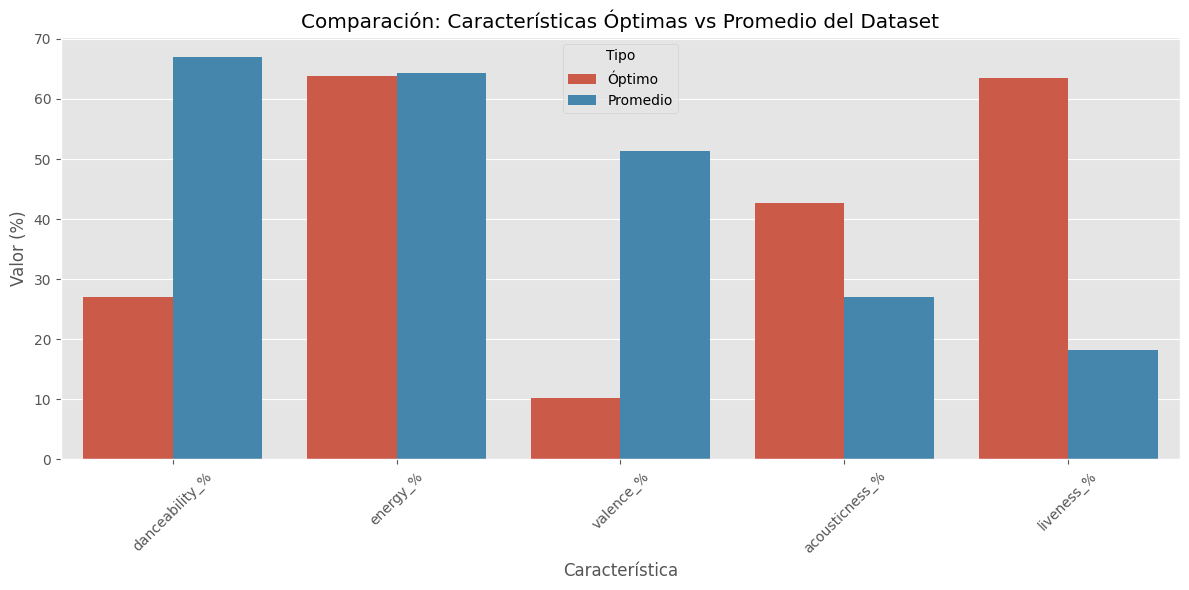

In [4]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler

# 1. Carga y preparación de datos
# (Usando el mismo código de limpieza anterior)
df = pd.read_csv('spotify-2023.csv', encoding='latin-1')
df['streams'] = pd.to_numeric(df['streams'].str.replace(',', ''), errors='coerce')
df = df.dropna(subset=['streams', 'danceability_%', 'energy_%', 'valence_%'])

# Normalizar los streams para usarlos como fitness
scaler = MinMaxScaler()
df['streams_normalized'] = scaler.fit_transform(df[['streams']])

# 2. Configuración del Algoritmo Genético
class GeneticAlgorithm:
    def __init__(self, data, population_size=50, generations=100, mutation_rate=0.1):
        self.data = data
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.features = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'liveness_%']

    def initialize_population(self):
        population = []
        for _ in range(self.population_size):
            individual = {
                'danceability_%': random.uniform(0, 100),
                'energy_%': random.uniform(0, 100),
                'valence_%': random.uniform(0, 100),
                'acousticness_%': random.uniform(0, 100),
                'liveness_%': random.uniform(0, 100)
            }
            population.append(individual)
        return population

    def fitness(self, individual):
        # Buscar canciones similares en el dataset y promediar su éxito
        similar_songs = self.data[
            (self.data['danceability_%'].between(individual['danceability_%']-10, individual['danceability_%']+10)) &
            (self.data['energy_%'].between(individual['energy_%']-10, individual['energy_%']+10)) &
            (self.data['valence_%'].between(individual['valence_%']-10, individual['valence_%']+10))
        ]

        if len(similar_songs) > 0:
            return similar_songs['streams_normalized'].mean()
        return 0

    def select_parents(self, population, fitness_scores):
        total_fitness = sum(fitness_scores)
        if total_fitness == 0:
            return random.choices(population, k=2)
        probabilities = [score/total_fitness for score in fitness_scores]
        return random.choices(population, weights=probabilities, k=2)

    def crossover(self, parent1, parent2):
        child = {}
        for feature in self.features:
            # Crossover uniforme
            if random.random() > 0.5:
                child[feature] = parent1[feature]
            else:
                child[feature] = parent2[feature]
        return child

    def mutate(self, individual):
        for feature in self.features:
            if random.random() < self.mutation_rate:
                # Mutación gaussiana
                individual[feature] = max(0, min(100, individual[feature] + random.gauss(0, 10)))
        return individual

    def run(self):
        population = self.initialize_population()
        best_individual = None
        best_fitness = 0

        for generation in range(self.generations):
            fitness_scores = [self.fitness(ind) for ind in population]

            # Encontrar el mejor individuo de esta generación
            current_best_idx = np.argmax(fitness_scores)
            if fitness_scores[current_best_idx] > best_fitness:
                best_fitness = fitness_scores[current_best_idx]
                best_individual = population[current_best_idx]

            # Crear nueva población
            new_population = []
            for _ in range(self.population_size // 2):
                parent1, parent2 = self.select_parents(population, fitness_scores)
                child1 = self.crossover(parent1, parent2)
                child2 = self.crossover(parent2, parent1)
                new_population.extend([self.mutate(child1), self.mutate(child2)])

            population = new_population

            # Reporte de progreso
            if generation % 10 == 0:
                print(f"Generación {generation}: Mejor fitness = {best_fitness:.4f}")

        return best_individual, best_fitness

# 3. Ejecutar el algoritmo genético
print("\nEjecutando algoritmo genético para encontrar combinación óptima...")
ga = GeneticAlgorithm(df, population_size=30, generations=50)
best_song_features, best_fitness = ga.run()

# 4. Resultados
print("\nMejor combinación encontrada de características musicales:")
for feature, value in best_song_features.items():
    print(f"{feature}: {value:.1f}%")

print(f"\nFitness (éxito estimado): {best_fitness:.4f}")

# 5. Encontrar canciones reales similares a la solución óptima
print("\nCanciones reales más similares a la combinación óptima:")
df['similarity_score'] = df.apply(lambda row: sum(
    abs(row[feature] - best_song_features[feature]) for feature in ga.features
), axis=1)

similar_songs = df.nsmallest(5, 'similarity_score')[['track_name', 'artist(s)_name', 'streams'] + ga.features]
print(similar_songs)

# 6. Visualización de la solución óptima vs promedio
avg_features = df[ga.features].mean()
optimal_vs_avg = pd.DataFrame({
    'Característica': ga.features,
    'Óptimo': [best_song_features[f] for f in ga.features],
    'Promedio': [avg_features[f] for f in ga.features]
}).melt(id_vars='Característica', var_name='Tipo', value_name='Valor')

plt.figure(figsize=(12, 6))
sns.barplot(x='Característica', y='Valor', hue='Tipo', data=optimal_vs_avg)
plt.title('Comparación: Características Óptimas vs Promedio del Dataset')
plt.ylabel('Valor (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

PRIMER MODELO: REGRESIÓN LINEAL

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset
spotify_df = pd.read_csv("spotify-2023.csv", encoding='latin-1')

# Limpiar columna de 'streams'
spotify_df['streams'] = pd.to_numeric(spotify_df['streams'].str.replace(',', ''), errors='coerce')
spotify_df = spotify_df.dropna(subset=['streams'])

# Opcional: eliminar outliers extremos por encima del percentil 99.5
spotify_df = spotify_df[spotify_df['streams'] < spotify_df['streams'].quantile(0.995)]

# Selección de características
features = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%',
            'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm']

# Normalización de porcentajes
for feature in features:
    if '%' in feature:
        spotify_df[feature] = pd.to_numeric(spotify_df[feature], errors='coerce') / 100

# Quitar NaNs
spotify_df = spotify_df.dropna(subset=features)
X = spotify_df[features]
y = np.log1p(spotify_df['streams'])  # log-transformación para normalizar

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento robusto
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Regresión Ridge con búsqueda de alpha óptimo
ridge = RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5)
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Resultados sin notación científica
print("🔧 Modelo de Regresión Lineal Optimizado (con Ridge + log-streams)")
print(f"MSE: {mse:,.4f}")
print(f"RMSE: {rmse:,.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mejor alpha (regularización): {ridge.alpha_}")

# Importancia de características
importancia = pd.DataFrame({
    'Feature': features,
    'Importance': np.abs(ridge.coef_)
}).sort_values('Importance', ascending=False)
print("\nImportancia de características:")
print(importancia)

# Predicciones para todo el dataset (invirtiendo la transformación log1p)
spotify_df['predicted_streams'] = np.expm1(ridge.predict(scaler.transform(X)))
spotify_df['potential'] = spotify_df['predicted_streams'] - spotify_df['streams']

# Top recomendaciones
recom = spotify_df.sort_values('potential', ascending=False).head(5)
print("\n🎧 Recomendaciones de canciones con potencial no explotado:")
for i, row in recom.iterrows():
    print(f"{row['track_name']} por {row['artist(s)_name']} — Streams actuales: {int(row['streams']):,}, Predichos: {int(row['predicted_streams']):,}")



🔧 Modelo de Regresión Lineal Optimizado (con Ridge + log-streams)
MSE: 1.9224
RMSE: 1.3865
R² Score: -0.0334
Mejor alpha (regularización): 79.06043210907701

Importancia de características:
              Feature  Importance
3      acousticness_%           0
0      danceability_%           0
5          liveness_%           0
6       speechiness_%           0
1            energy_%           0
4  instrumentalness_%           0
7                 bpm           0
2           valence_%           0

🎧 Recomendaciones de canciones con potencial no explotado:
Que Vuelvas por Carin Leon, Grupo Frontera — Streams actuales: 2,762, Predichos: 395,218,112
Back To December (Taylor's Version) por Taylor Swift — Streams actuales: 39,228,929, Predichos: 405,135,356
Enchanted (Taylor's Version) por Taylor Swift — Streams actuales: 39,578,178, Predichos: 392,135,256
Man Made A Bar (feat. Eric Church) por Morgan Wallen, Eric Church — Streams actuales: 58,890,931, Predichos: 380,832,559
Crown por Kendrick La

SEGUNDO MODELO: RANDOM FOREST

Mejores hiperparámetros encontrados: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}

Métricas del Modelo Random Forest:
Precisión: 0.7749

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87       148
           1       0.50      0.05      0.09        43

    accuracy                           0.77       191
   macro avg       0.64      0.52      0.48       191
weighted avg       0.72      0.77      0.69       191


Matriz de confusión guardada como 'rf_confusion_matrix.png'

Importancia de características:
               Feature  Importance
7                  bpm           0
9  energetic_danceable           0
2            valence_%           0
3       acousticness_%           0
0       danceability_%           0
5           liveness_%           0
1             energy_%           0
6        speechiness_%           0
4   instrumentaln

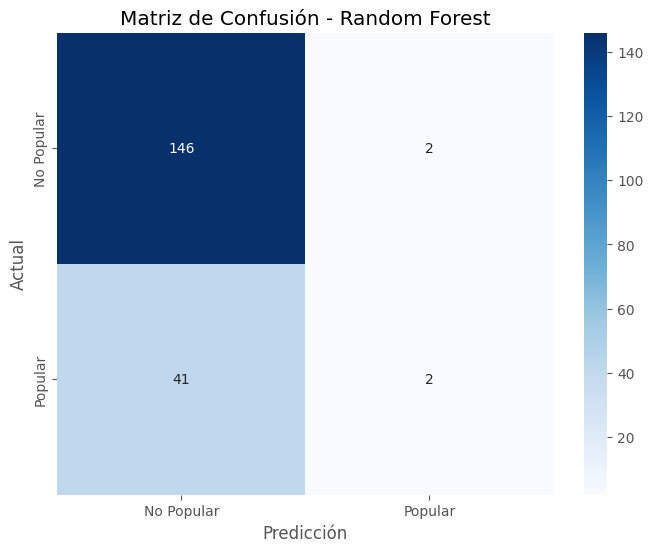

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset
spotify_df = pd.read_csv("spotify-2023.csv", encoding='latin-1')
spotify_df['streams'] = pd.to_numeric(spotify_df['streams'].str.replace(',', ''), errors='coerce')
spotify_df = spotify_df.dropna(subset=['streams'])

# Agregar características
features = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%',
           'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm']

# Convertir a numérico y normalizar porcentajes
for feature in features:
    if '%' in feature:
        spotify_df[feature] = pd.to_numeric(spotify_df[feature], errors='coerce') / 100

# Agregar características adicionales
if 'key' in spotify_df.columns:
    spotify_df['key'] = pd.to_numeric(spotify_df['key'], errors='coerce')
    features.append('key')

# Ingeniería de características: combinar energía y danceability
if 'danceability_%' in spotify_df.columns and 'energy_%' in spotify_df.columns:
    spotify_df['energetic_danceable'] = spotify_df['danceability_%'] * spotify_df['energy_%']
    features.append('energetic_danceable')

X = spotify_df[features].fillna(0)  # Manejar valores NaN

# Definir límite para clasificación binaria (popular = top 25% de streams)
threshold = spotify_df['streams'].quantile(0.75)
y_class = (spotify_df['streams'] >= threshold).astype(int)

# Dividir datos para clasificación
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optimizar hiperparámetros con RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rand_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42
)

rand_search.fit(X_train_scaled, y_train)
best_params = rand_search.best_params_
print(f"Mejores hiperparámetros encontrados: {best_params}")

# Entrenar modelo con mejores parámetros
rf_model = RandomForestClassifier(**best_params, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Evaluar el modelo
y_pred = rf_model.predict(X_test_scaled)
y_pred_prob = rf_model.predict_proba(X_test_scaled)[:, 1]
accuracy = accuracy_score(y_test, y_pred)

print(f"\nMétricas del Modelo Random Forest:")
print(f"Precisión: {accuracy:.4f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Mostrar matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Popular', 'Popular'],
            yticklabels=['No Popular', 'Popular'])
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Random Forest')
plt.savefig('rf_confusion_matrix.png')
print("\nMatriz de confusión guardada como 'rf_confusion_matrix.png'")

# Importancia de características
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
})
print("\nImportancia de características:")
print(feature_importance.sort_values('Importance', ascending=False))

# Obtener probabilidades de éxito para todo el dataset
spotify_df['rf_prob_success'] = rf_model.predict_proba(scaler.transform(X))[:, 1]

# Estrategia de recomendación: identificar canciones con alta probabilidad de ser populares
# pero que actualmente no están en el top 25%
non_popular = spotify_df[spotify_df['streams'] < threshold]
recommendations = non_popular.sort_values('rf_prob_success', ascending=False).head(5)

print("\nRecomendaciones de Random Forest (canciones con alto potencial):")
for i, (idx, row) in enumerate(recommendations.iterrows()):
    print(f"{i+1}. '{row['track_name']}' por {row['artist(s)_name']} - Prob. de éxito: {row['rf_prob_success']:.2f}")

TERCER MODELO: RED NEURONAL

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.5584 - loss: 0.7189 - val_accuracy: 0.6667 - val_loss: 0.6580 - learning_rate: 0.0010
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6695 - loss: 0.6239 - val_accuracy: 0.7190 - val_loss: 0.6234 - learning_rate: 0.0010
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6948 - loss: 0.5897 - val_accuracy: 0.7320 - val_loss: 0.6025 - learning_rate: 0.0010
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7399 - loss: 0.5637 - val_accuracy: 0.7320 - val_loss: 0.5894 - learning_rate: 0.0010
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7449 - loss: 0.5509 - val_accuracy: 0.7320 - val_loss: 0.5799 - learning_rate: 0.0010
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7594 - loss: 0.5495 - val_accuracy: 0.7320 - val_loss: 0.5722 - learning_rate: 0.0010
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7502 - loss: 0.5534 - val_ac

<ipython-input-7-aea74a204b70>:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_popular['uniqueness'] = uniqueness_scores
<ipython-input-7-aea74a204b70>:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_popular['discovery_score'] = non_popular['nn_prob_success'] * (0.7 + 0.3 * non_popular['uniqueness'])



Recomendaciones de la Red Neuronal (descubrimientos únicos):
1. 'Bigger Than The Whole Sky' por Taylor Swift - Prob: 0.47, Unicidad: 1.43
2. 'Notion' por The Rare Occasions - Prob: 0.52, Unicidad: 1.01
3. 'Lift Me Up - From Black Panther: Wakanda Forever - Music From and Inspired By' por Rihanna - Prob: 0.43, Unicidad: 1.60
4. 'Sweet Nothing' por Taylor Swift - Prob: 0.42, Unicidad: 1.56
5. 'The Rumbling (TV Size)' por SiM - Prob: 0.50, Unicidad: 0.82


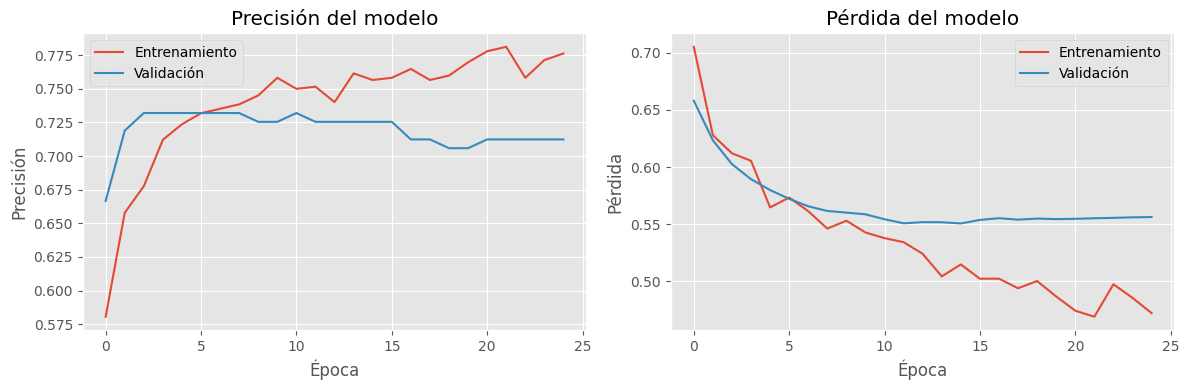

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Configurar para reproducibilidad
np.random.seed(42)
tf.random.set_seed(42)

# Cargar dataset
spotify_df = pd.read_csv("spotify-2023.csv", encoding='latin-1')
spotify_df['streams'] = pd.to_numeric(spotify_df['streams'].str.replace(',', ''), errors='coerce')
spotify_df = spotify_df.dropna(subset=['streams'])

# Características numéricas
numeric_features = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%',
                    'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm']

# Características categóricas (si están disponibles)
categorical_features = []
if 'key' in spotify_df.columns:
    categorical_features.append('key')
if 'mode' in spotify_df.columns:
    categorical_features.append('mode')

# Convertir a numérico y normalizar porcentajes
for feature in numeric_features:
    if '%' in feature:
        spotify_df[feature] = pd.to_numeric(spotify_df[feature], errors='coerce') / 100

# Crear características derivadas
spotify_df['energy_dance_product'] = spotify_df['energy_%'] * spotify_df['danceability_%']
numeric_features.append('energy_dance_product')

# Preparar X e y
X_numeric = spotify_df[numeric_features].fillna(0)
X_categorical = spotify_df[categorical_features].fillna('unknown') if categorical_features else pd.DataFrame()

# Combinar características
if categorical_features:
    # Preprocesamiento para características mixtas
    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    X_processed = preprocessor.fit_transform(pd.concat([X_numeric, X_categorical], axis=1))
else:
    # Solo características numéricas
    scaler = StandardScaler()
    X_processed = scaler.fit_transform(X_numeric)

# Definir límite para clasificación (populares = top 25%)
threshold = spotify_df['streams'].quantile(0.75)
y_class = (spotify_df['streams'] >= threshold).astype(int)

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_class, test_size=0.2, random_state=42)

# Construir la red neuronal
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks para mejorar el entrenamiento
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001
)

# Entrenar modelo
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluar el modelo
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nMétricas del Modelo de Red Neuronal:")
print(f"Precisión: {accuracy:.4f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Gráfica de aprendizaje
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'])
plt.tight_layout()
plt.savefig('nn_learning_curves.png')
print("\nCurvas de aprendizaje guardadas como 'nn_learning_curves.png'")

# Predecir probabilidades para todo el dataset
if categorical_features:
    X_full = preprocessor.transform(pd.concat([X_numeric, X_categorical], axis=1))
else:
    X_full = scaler.transform(X_numeric)

spotify_df['nn_prob_success'] = model.predict(X_full).flatten()

# Estrategia de recomendación: identificar canciones con características únicas y alta probabilidad
# Primero, encontramos canciones que no son populares pero tienen alta probabilidad
non_popular = spotify_df[spotify_df['streams'] < threshold]

# Crear un score que combine probabilidad y rareza de las características
# (favorecer canciones con perfiles únicos)
feature_means = X_numeric.mean()
feature_stds = X_numeric.std()

uniqueness_scores = []
for idx, row in non_popular.iterrows():
    feature_values = row[numeric_features]
    # Calcular qué tan lejos está cada característica de la media (en términos de desviaciones estándar)
    z_scores = abs((feature_values - feature_means) / feature_stds)
    # Tomar la media de los z-scores como medida de unicidad
    uniqueness = z_scores.mean()
    uniqueness_scores.append(uniqueness)

non_popular['uniqueness'] = uniqueness_scores
# Combinar probabilidad y unicidad
non_popular['discovery_score'] = non_popular['nn_prob_success'] * (0.7 + 0.3 * non_popular['uniqueness'])

# Recomendar las 5 canciones con mayor discovery_score
recommendations = non_popular.sort_values('discovery_score', ascending=False).head(5)

print("\nRecomendaciones de la Red Neuronal (descubrimientos únicos):")
for i, (idx, row) in enumerate(recommendations.iterrows()):
    print(f"{i+1}. '{row['track_name']}' por {row['artist(s)_name']} - Prob: {row['nn_prob_success']:.2f}, Unicidad: {row['uniqueness']:.2f}")

🎵 Análisis de Popularidad Musical con Red Neuronal Optimizada
✅ Datos cargados: 952 canciones, 10 características
📊 Canciones populares: 238 (25.0%)

🧠 Entrenando red neuronal...
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.5218 - loss: 0.6978 - val_accuracy: 0.7539 - val_loss: 0.6368
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7154 - loss: 0.6169 - val_accuracy: 0.7487 - val_loss: 0.6004
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7508 - loss: 0.5797 - val_accuracy: 0.7487 - val_loss: 0.5848
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7574 - loss: 0.5579 - val_accuracy: 0.7487 - val_loss: 0.5830
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7586 - loss: 0.5509 - val_accuracy: 0.7487 - val_loss: 0.5839
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7586 - loss: 0.5418 - val_accuracy: 0.7487 - val_loss: 0.5849
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7586 - loss: 0.5422 - val_accuracy: 0.7487 - val_loss: 0.5856
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7583 - loss: 0.5569 - val_accuracy: 0.7487 - val_loss:

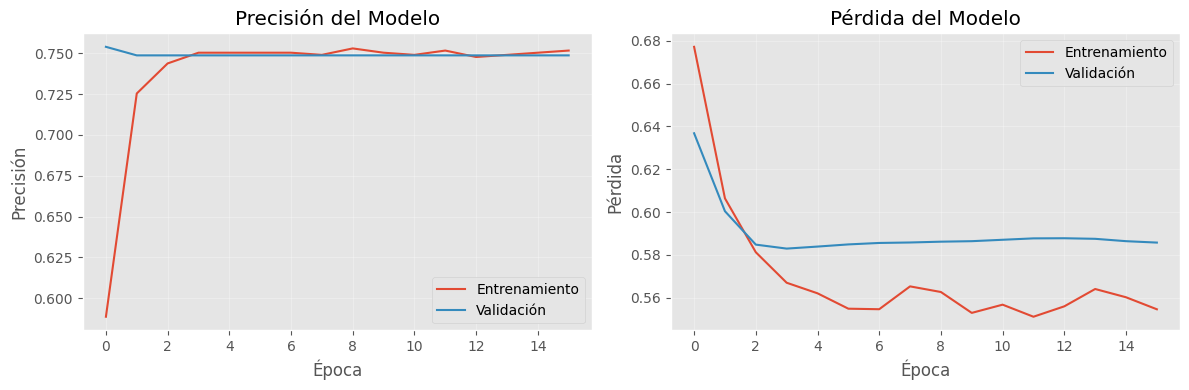


🎯 RECOMENDACIONES - Joyas Ocultas:
--------------------------------------------------
No se encontraron recomendaciones con los criterios especificados
✅ Análisis completado!


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Configurar semillas para reproducibilidad
np.random.seed(42)
tf.random.set_seed(42)

def load_and_preprocess_data(file_path):
    """Cargar y preprocesar datos de Spotify"""
    try:
        df = pd.read_csv(file_path, encoding='latin-1')

        # Limpiar columna streams
        df['streams'] = pd.to_numeric(df['streams'].astype(str).str.replace(',', ''), errors='coerce')
        df = df.dropna(subset=['streams'])

        # Características numéricas principales
        numeric_features = [
            'danceability_%', 'energy_%', 'valence_%', 'acousticness_%',
            'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm'
        ]

        # Verificar que las columnas existen
        available_features = [col for col in numeric_features if col in df.columns]

        # Convertir porcentajes a decimales
        for feature in available_features:
            if '%' in feature:
                df[feature] = pd.to_numeric(df[feature], errors='coerce') / 100

        # Crear características derivadas más efectivas
        if 'energy_%' in available_features and 'danceability_%' in available_features:
            df['energy_dance_ratio'] = df['energy_%'] / (df['danceability_%'] + 0.01)  # Evitar división por 0
            available_features.append('energy_dance_ratio')

        if 'valence_%' in available_features and 'energy_%' in available_features:
            df['mood_energy_combo'] = df['valence_%'] * df['energy_%']
            available_features.append('mood_energy_combo')

        return df, available_features

    except Exception as e:
        print(f"Error cargando datos: {e}")
        return None, []

def create_optimized_model(input_dim):
    """Crear modelo de red neuronal optimizado"""
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.0005),  # Learning rate más conservador
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

def plot_training_history(history):
    """Visualizar el entrenamiento"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Precisión
    ax1.plot(history.history['accuracy'], label='Entrenamiento')
    ax1.plot(history.history['val_accuracy'], label='Validación')
    ax1.set_title('Precisión del Modelo')
    ax1.set_xlabel('Época')
    ax1.set_ylabel('Precisión')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Pérdida
    ax2.plot(history.history['loss'], label='Entrenamiento')
    ax2.plot(history.history['val_loss'], label='Validación')
    ax2.set_title('Pérdida del Modelo')
    ax2.set_xlabel('Época')
    ax2.set_ylabel('Pérdida')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('modelo_entrenamiento.png', dpi=300, bbox_inches='tight')
    plt.show()

def get_recommendations(df, model, scaler, features, n_recommendations=5):
    """Generar recomendaciones basadas en el modelo"""
    # Preparar datos para predicción
    X_full = df[features].fillna(df[features].median())
    X_full_scaled = scaler.transform(X_full)

    # Predecir probabilidades
    probabilities = model.predict(X_full_scaled, verbose=0).flatten()
    df['probability_success'] = probabilities

    # Definir umbral de popularidad (top 20%)
    threshold = df['streams'].quantile(0.8)

    # Encontrar canciones no populares con alta probabilidad
    hidden_gems = df[
        (df['streams'] < threshold) &
        (df['probability_success'] > 0.6)
    ].sort_values('probability_success', ascending=False)

    return hidden_gems.head(n_recommendations)

# Programa principal
def main():
    print("🎵 Análisis de Popularidad Musical con Red Neuronal Optimizada")
    print("=" * 60)

    # Cargar datos
    df, features = load_and_preprocess_data("spotify-2023.csv")

    if df is None or len(features) == 0:
        print("❌ Error: No se pudieron cargar los datos correctamente")
        return

    print(f"✅ Datos cargados: {len(df)} canciones, {len(features)} características")

    # Preparar características
    X = df[features].fillna(df[features].median())

    # Definir variable objetivo (top 25% como populares)
    threshold = df['streams'].quantile(0.75)
    y = (df['streams'] >= threshold).astype(int)

    print(f"📊 Canciones populares: {y.sum()} ({y.mean()*100:.1f}%)")

    # Dividir y escalar datos
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Crear y entrenar modelo
    print("\n🧠 Entrenando red neuronal...")
    model = create_optimized_model(X_train_scaled.shape[1])

    # Callback para detener entrenamiento temprano
    early_stopping = EarlyStopping(
        monitor='val_accuracy',
        patience=15,
        restore_best_weights=True,
        verbose=1
    )

    # Entrenar modelo
    history = model.fit(
        X_train_scaled, y_train,
        validation_data=(X_test_scaled, y_test),
        epochs=100,
        batch_size=64,
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluar modelo
    y_pred_prob = model.predict(X_test_scaled, verbose=0)
    y_pred = (y_pred_prob > 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"\n📈 RESULTADOS DEL MODELO:")
    print(f"Precisión: {accuracy:.4f} ({accuracy*100:.1f}%)")
    print("\nReporte detallado:")
    print(classification_report(y_test, y_pred))

    # Visualizar entrenamiento
    plot_training_history(history)

    # Generar recomendaciones
    print("\n🎯 RECOMENDACIONES - Joyas Ocultas:")
    print("-" * 50)

    recommendations = get_recommendations(df, model, scaler, features)

    if len(recommendations) > 0:
        for i, (_, song) in enumerate(recommendations.iterrows(), 1):
            print(f"{i}. '{song['track_name']}' - {song['artist(s)_name']}")
            print(f"   Probabilidad: {song['probability_success']:.3f} | Streams: {song['streams']:,}")
            print()
    else:
        print("No se encontraron recomendaciones con los criterios especificados")

    print("✅ Análisis completado!")

if __name__ == "__main__":
    main()

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy import stats

class SpotifyPCAClassifier:
    def __init__(self):
        self.scaler = StandardScaler()
        self.pca = None
        self.df = None
        self.features = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%',
                        'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm']

    # ========== SECCIÓN 1: CLASIFICACIÓN ==========
    def load_and_classify_data(self, filepath="spotify-2023.csv"):
        """Carga datos y define clasificaciones de popularidad"""
        print("📊 SECCIÓN 1: CLASIFICACIÓN DE DATOS")
        print("-" * 40)

        # Cargar datos
        self.df = pd.read_csv(filepath, encoding='latin-1')
        self.df['streams'] = pd.to_numeric(self.df['streams'].str.replace(',', ''), errors='coerce')
        self.df = self.df.dropna(subset=['streams'])

        # Convertir porcentajes
        for feat in self.features:
            if '%' in feat:
                self.df[feat] = pd.to_numeric(self.df[feat], errors='coerce') / 100

        # Clasificar por popularidad (etiquetas verdaderas)
        top5_threshold = self.df['streams'].quantile(0.95)  # Top 5%
        popular_threshold = self.df['streams'].quantile(0.75)  # Top 25%

        self.df['true_class'] = 0  # No popular
        self.df.loc[self.df['streams'] >= popular_threshold, 'true_class'] = 1  # Popular
        self.df.loc[self.df['streams'] >= top5_threshold, 'true_class'] = 2  # Top Hit

        print(f"✅ Datos cargados: {len(self.df)} canciones")
        print(f"   - No populares: {(self.df['true_class'] == 0).sum()}")
        print(f"   - Populares: {(self.df['true_class'] == 1).sum()}")
        print(f"   - Top Hits: {(self.df['true_class'] == 2).sum()}\n")

        return self.df

    # ========== SECCIÓN 2: ENTRENAMIENTO ==========
    def train_pca_model(self):
        """Entrena modelo PCA y genera predicciones"""
        print("🎯 SECCIÓN 2: ENTRENAMIENTO DEL MODELO PCA")
        print("-" * 40)

        # Preparar características
        X = self.df[self.features].fillna(0)

        # Normalizar datos
        X_scaled = self.scaler.fit_transform(X)
        print(f"✅ Datos normalizados: {X_scaled.shape}")

        # Entrenar PCA
        self.pca = PCA(n_components=0.95)  # 95% varianza
        X_pca = self.pca.fit_transform(X_scaled)
        print(f"✅ PCA entrenado: {self.pca.n_components_} componentes")
        print(f"   Varianza explicada: {self.pca.explained_variance_ratio_.sum():.2%}")

        # Calcular scores PCA ponderados
        weights = self.pca.explained_variance_ratio_
        pca_scores = np.sum(X_pca * weights, axis=1)

        # Generar predicciones basadas en PCA scores
        score_percentiles = stats.rankdata(pca_scores) / len(pca_scores)

        # Clasificar basado en percentiles PCA
        predicted_class = np.zeros(len(self.df))
        predicted_class[score_percentiles >= 0.75] = 1  # Popular
        predicted_class[score_percentiles >= 0.95] = 2  # Top Hit

        self.df['pca_score'] = pca_scores
        self.df['pca_percentile'] = score_percentiles
        self.df['predicted_class'] = predicted_class

        print(f"✅ Predicciones generadas")
        print(f"   - Predichas No populares: {(predicted_class == 0).sum()}")
        print(f"   - Predichas Populares: {(predicted_class == 1).sum()}")
        print(f"   - Predichas Top Hits: {(predicted_class == 2).sum()}\n")

        return X_pca, predicted_class

    # ========== SECCIÓN 3: RESULTADOS Y PRECISIÓN ==========
    def evaluate_and_show_results(self):
        """Evalúa precisión del modelo y muestra top 5"""
        print("📈 SECCIÓN 3: RESULTADOS Y PRECISIÓN")
        print("-" * 40)

        # Calcular métricas de precisión
        y_true = self.df['true_class']
        y_pred = self.df['predicted_class']

        # Métricas generales
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

        print("🎯 MÉTRICAS DE PRECISIÓN:")
        print(f"   Exactitud (Accuracy): {accuracy:.2%}")
        print(f"   Precisión (Precision): {precision:.2%}")
        print(f"   Sensibilidad (Recall): {recall:.2%}")
        print(f"   F1-Score: {f1:.2%}")

        # Precisión por clase
        for class_num in [0, 1, 2]:
            class_names = ['No Popular', 'Popular', 'Top Hit']
            true_positive = ((y_true == class_num) & (y_pred == class_num)).sum()
            predicted_positive = (y_pred == class_num).sum()
            actual_positive = (y_true == class_num).sum()

            class_precision = true_positive / predicted_positive if predicted_positive > 0 else 0
            class_recall = true_positive / actual_positive if actual_positive > 0 else 0



        # TOP 5 ACTUALES (Realmente exitosos)
        current_top5 = self.df[self.df['true_class'] == 2].nlargest(5, 'streams')
        print("🏆 TOP 5 CANCIONES ACTUALES (Confirmados):")
        print("-" * 50)
        for i, (_, row) in enumerate(current_top5.iterrows(), 1):
            confidence = row['pca_percentile']
            print(f"{i}. '{row['track_name']}' - {row['artist(s)_name']}")
            print(f"   Streams: {row['streams']:,}")



        # TOP 5 CANDIDATOS (Potencial según PCA)
        candidates = self.df[
            (self.df['true_class'] < 2) &
            (self.df['predicted_class'] >= 1)
        ].nlargest(5, 'pca_percentile')

        print("💎 TOP 5 CANDIDATOS CON POTENCIAL (Según PCA):")
        print("-" * 50)
        for i, (_, row) in enumerate(candidates.iterrows(), 1):
            confidence = row['pca_percentile']
            current_status = ['No Popular', 'Popular', 'Top Hit'][int(row['true_class'])]
            print(f"{i}. '{row['track_name']}' - {row['artist(s)_name']}")
            print(f"   Streams: {row['streams']:,}")
            print(f"   Confianza PCA: {confidence:.1%}")
            print(f"   Estado actual: {current_status}")
            print(f"   Potencial: {'Alto' if confidence > 0.9 else 'Medio'}\n")

        return {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'current_top5': current_top5,
            'candidates': candidates
        }

def run_complete_analysis(filepath="spotify-2023.csv"):
    """Ejecuta análisis completo"""
    print("🎵 ANÁLISIS SPOTIFY CON PCA")
    print("="*50)

    classifier = SpotifyPCAClassifier()

    # Sección 1: Clasificación
    classifier.load_and_classify_data(filepath)

    # Sección 2: Entrenamiento
    classifier.train_pca_model()

    # Sección 3: Resultados
    results = classifier.evaluate_and_show_results()

    print("="*50)
    print("🎉 ANÁLISIS COMPLETO FINALIZADO")
    print(f"📊 Precisión general del modelo: {results['accuracy']:.1%}")

    return classifier, results

# Ejecutar análisis completo
if __name__ == "__main__":
    classifier, results = run_complete_analysis()

🎵 ANÁLISIS SPOTIFY CON PCA
📊 SECCIÓN 1: CLASIFICACIÓN DE DATOS
----------------------------------------
✅ Datos cargados: 952 canciones
   - No populares: 714
   - Populares: 190
   - Top Hits: 48

🎯 SECCIÓN 2: ENTRENAMIENTO DEL MODELO PCA
----------------------------------------
✅ Datos normalizados: (952, 8)
✅ PCA entrenado: 7 componentes
   Varianza explicada: 96.13%
✅ Predicciones generadas
   - Predichas No populares: 713
   - Predichas Populares: 191
   - Predichas Top Hits: 48

📈 SECCIÓN 3: RESULTADOS Y PRECISIÓN
----------------------------------------
🎯 MÉTRICAS DE PRECISIÓN:
   Exactitud (Accuracy): 58.19%
   Precisión (Precision): 58.25%
   Sensibilidad (Recall): 58.19%
   F1-Score: 58.22%
🏆 TOP 5 CANCIONES ACTUALES (Confirmados):
--------------------------------------------------
1. 'Blinding Lights' - The Weeknd
   Streams: 3,703,895,074.0
2. 'Shape of You' - Ed Sheeran
   Streams: 3,562,543,890.0
3. 'Someone You Loved' - Lewis Capaldi
   Streams: 2,887,241,814.0
4. 'Dance

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats

class SpotifyPCAClassifier:
    def __init__(self):
        self.scaler = StandardScaler()
        self.pca = None
        self.df = None
        self.features = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%',
                         'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm']

    # ========== SECCIÓN 1: CLASIFICACIÓN ==========
    def load_and_classify_data(self, filepath="spotify-2023.csv"):
        print("📊 SECCIÓN 1: CLASIFICACIÓN DE DATOS")
        print("-" * 40)

        self.df = pd.read_csv(filepath, encoding='latin-1')
        self.df['streams'] = pd.to_numeric(self.df['streams'].str.replace(',', ''), errors='coerce')
        self.df = self.df.dropna(subset=['streams'])

        for feat in self.features:
            if '%' in feat:
                self.df[feat] = pd.to_numeric(self.df[feat], errors='coerce') / 100

        top5_threshold = self.df['streams'].quantile(0.95)
        popular_threshold = self.df['streams'].quantile(0.75)

        self.df['true_class'] = 0
        self.df.loc[self.df['streams'] >= popular_threshold, 'true_class'] = 1
        self.df.loc[self.df['streams'] >= top5_threshold, 'true_class'] = 2

        print(f"✅ Datos cargados: {len(self.df)} canciones")
        return self.df

    # ========== SECCIÓN 2: ENTRENAMIENTO ==========
    def train_pca_model(self):
        print("🎯 SECCIÓN 2: ENTRENAMIENTO DEL MODELO PCA")
        print("-" * 40)

        X = self.df[self.features].fillna(0)
        X_scaled = self.scaler.fit_transform(X)

        self.pca = PCA(n_components=0.95)
        X_pca = self.pca.fit_transform(X_scaled)

        weights = self.pca.explained_variance_ratio_
        pca_scores = np.sum(X_pca * weights, axis=1)

        score_percentiles = stats.rankdata(pca_scores) / len(pca_scores)

        predicted_class = np.zeros(len(self.df))
        predicted_class[score_percentiles >= 0.75] = 1
        predicted_class[score_percentiles >= 0.95] = 2

        self.df['pca_score'] = pca_scores
        self.df['pca_percentile'] = score_percentiles
        self.df['predicted_class'] = predicted_class

        print(f"✅ PCA entrenado con {self.pca.n_components_} componentes")
        print(f"🔍 Varianza explicada total: {self.pca.explained_variance_ratio_.sum():.2%}\n")

        return X_pca, predicted_class

    # ========== SECCIÓN 3: RESULTADOS ==========
    def evaluate_and_show_results(self):
        print("📈 SECCIÓN 3: RESULTADOS DEL MODELO PCA")
        print("-" * 40)

        current_top5 = self.df[self.df['true_class'] == 2].nlargest(5, 'streams')
        print("🏆 TOP 5 CANCIONES ACTUALES (Confirmadas):")
        for i, (_, row) in enumerate(current_top5.iterrows(), 1):
            print(f"{i}. '{row['track_name']}' - {row['artist(s)_name']} ({int(row['streams']):,} streams)")

        candidates = self.df[
            (self.df['true_class'] < 2) & (self.df['predicted_class'] >= 1)
        ].nlargest(5, 'pca_percentile')

        print("\n💎 TOP 5 CANDIDATOS CON POTENCIAL (Según PCA):")
        for i, (_, row) in enumerate(candidates.iterrows(), 1):
            print(f"{i}. '{row['track_name']}' - {row['artist(s)_name']}")
            print(f"   Streams: {int(row['streams']):,}")
            print(f"   Confianza PCA: {row['pca_percentile']:.1%}")
            print(f"   Estado actual: {['No Popular', 'Popular', 'Top Hit'][int(row['true_class'])]}")
            print(f"   Potencial: {'Alto' if row['pca_percentile'] > 0.9 else 'Medio'}\n")

        return {
            'explained_variance': self.pca.explained_variance_ratio_.sum(),
            'current_top5': current_top5,
            'candidates': candidates
        }

def run_complete_analysis(filepath="spotify-2023.csv"):
    print("🎵 ANÁLISIS SPOTIFY CON PCA")
    print("="*50)

    classifier = SpotifyPCAClassifier()
    classifier.load_and_classify_data(filepath)
    classifier.train_pca_model()
    results = classifier.evaluate_and_show_results()

    print("="*50)
    print("🎉 ANÁLISIS COMPLETO FINALIZADO")
    print(f"📊 Varianza explicada total del modelo: {results['explained_variance']:.2%}")

    return classifier, results

if __name__ == "__main__":
    classifier, results = run_complete_analysis()


🎵 ANÁLISIS SPOTIFY CON PCA
📊 SECCIÓN 1: CLASIFICACIÓN DE DATOS
----------------------------------------
✅ Datos cargados: 952 canciones
🎯 SECCIÓN 2: ENTRENAMIENTO DEL MODELO PCA
----------------------------------------
✅ PCA entrenado con 7 componentes
🔍 Varianza explicada total: 96.13%

📈 SECCIÓN 3: RESULTADOS DEL MODELO PCA
----------------------------------------
🏆 TOP 5 CANCIONES ACTUALES (Confirmadas):
1. 'Blinding Lights' - The Weeknd (3,703,895,074 streams)
2. 'Shape of You' - Ed Sheeran (3,562,543,890 streams)
3. 'Someone You Loved' - Lewis Capaldi (2,887,241,814 streams)
4. 'Dance Monkey' - Tones and I (2,864,791,672 streams)
5. 'Sunflower - Spider-Man: Into the Spider-Verse' - Post Malone, Swae Lee (2,808,096,550 streams)

💎 TOP 5 CANDIDATOS CON POTENCIAL (Según PCA):
1. 'Slut Me Out' - NLE Choppa
   Streams: 190,490,915
   Confianza PCA: 100.0%
   Estado actual: No Popular
   Potencial: Alto

2. 'On BS' - Drake, 21 Savage
   Streams: 170,413,877
   Confianza PCA: 99.9%
   Es

Top 5 canciones más escuchadas:
                              track_name     artist(s)_name  \
574  Love Grows (Where My Rosemary Goes)  Edison Lighthouse   
33                             Anti-Hero       Taylor Swift   
625                               Arcade    Duncan Laurence   
253                        Glimpse of Us               Joji   
455                       Seek & Destroy                SZA   

                                               streams  
574  BPM110KeyAModeMajorDanceability53Valence75Ener...  
33                                           999748277  
625                                          991336132  
253                                          988515741  
455                                           98709329  

5 canciones que podrían entrar al top (por similitud):
                            track_name     artist(s)_name    streams
0  Seven (feat. Latto) (Explicit Ver.)   Latto, Jung Kook  141381703
2                              vampire     Olivia Rod

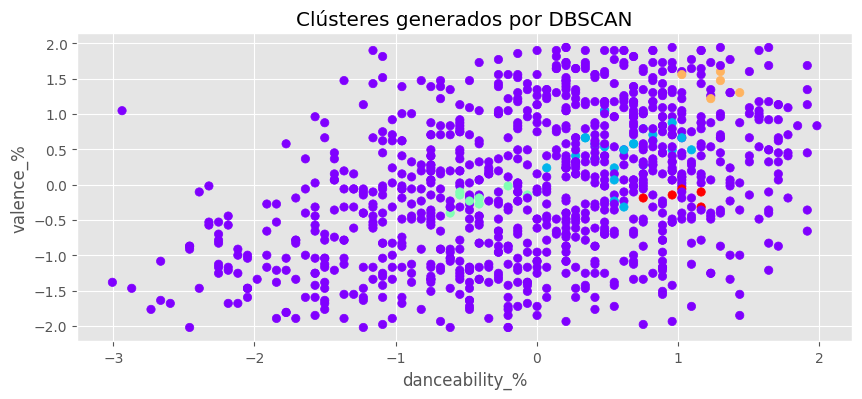

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


spotify= pd.read_csv("spotify-2023.csv", encoding='latin-1')

features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
            'instrumentalness_%', 'liveness_%', 'speechiness_%']
X = spotify[features].dropna()

X_scaled = StandardScaler().fit_transform(X)

dbs = DBSCAN(eps=0.5, min_samples=5)
dbs.fit(X_scaled)

spotify['cluster'] = dbs.labels_

top_5 = spotify.sort_values(by='streams', ascending=False).head(5)
print("Top 5 canciones más escuchadas:")
print(top_5[['track_name', 'artist(s)_name', 'streams']])

cluster_top = top_5.iloc[0]['cluster']
candidatas = spotify[spotify['cluster'] == cluster_top]
sugeridas = candidatas[~candidatas.index.isin(top_5.index)].head(5)

print("\n5 canciones que podrían entrar al top (por similitud):")
print(sugeridas[['track_name', 'artist(s)_name', 'streams']])

plt.figure(figsize=(10,4))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=dbs.labels_, cmap='rainbow')
plt.title("Clústeres generados por DBSCAN")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()